In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing csv
movies = pd.read_csv("movies.csv", encoding = "cp1252")
#Import CPI ($ conversion)
cpi = pd.read_csv('cpi.csv')
cpi = cpi.rename(columns={'Year': 'year', 'U.S. Consumer Price Index *' : 'CPI'})

#Merging cpi to movies df
df = pd.merge(movies, cpi, on='year')

In [3]:
# **THIS CELL TAKES ABOUT 4 MINUTES TO RUN**
# Applying conversion
df['gross_2016'] = ''

for i in range(len(df.CPI)):
    df['gross_2016'][i] = (240.01/df['CPI'][i])*df['gross'][i]

In [4]:
# Creating adjusted gross column
df["gross_2016"] = df['gross_2016'].astype(float)

In [5]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,CPI,gross_2016
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,109.6,1.145028e+08
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,109.6,1.535897e+08
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,109.6,3.937403e+08
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,109.6,1.864901e+08
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,109.6,4.065413e+07


In [6]:
# make sure that you run the read before running this a second time (command 28)
# did not have time to add error handling
#Dropping unused columns
df.drop(['budget', 'company', 'director', 'name', 'writer'], axis=1, inplace=True)

In [7]:
df.drop(['gross'], axis=1, inplace=True)
df.head()

,country,genre,rating,released,runtime,score,star,votes,year,CPI,gross_2016
0,USA,Adventure,R,1986-08-22,89,8.1,Wil Wheaton,299174,1986,109.6,1.145028e+08
1,USA,Comedy,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,1986,109.6,1.535897e+08
2,USA,Action,PG,1986-05-16,110,6.9,Tom Cruise,236909,1986,109.6,3.937403e+08
3,USA,Action,R,1986-07-18,137,8.4,Sigourney Weaver,540152,1986,109.6,1.864901e+08
4,USA,Adventure,PG,1986-08-01,90,6.9,Joey Cramer,36636,1986,109.6,4.065413e+07


#  Scatter plots before transformations

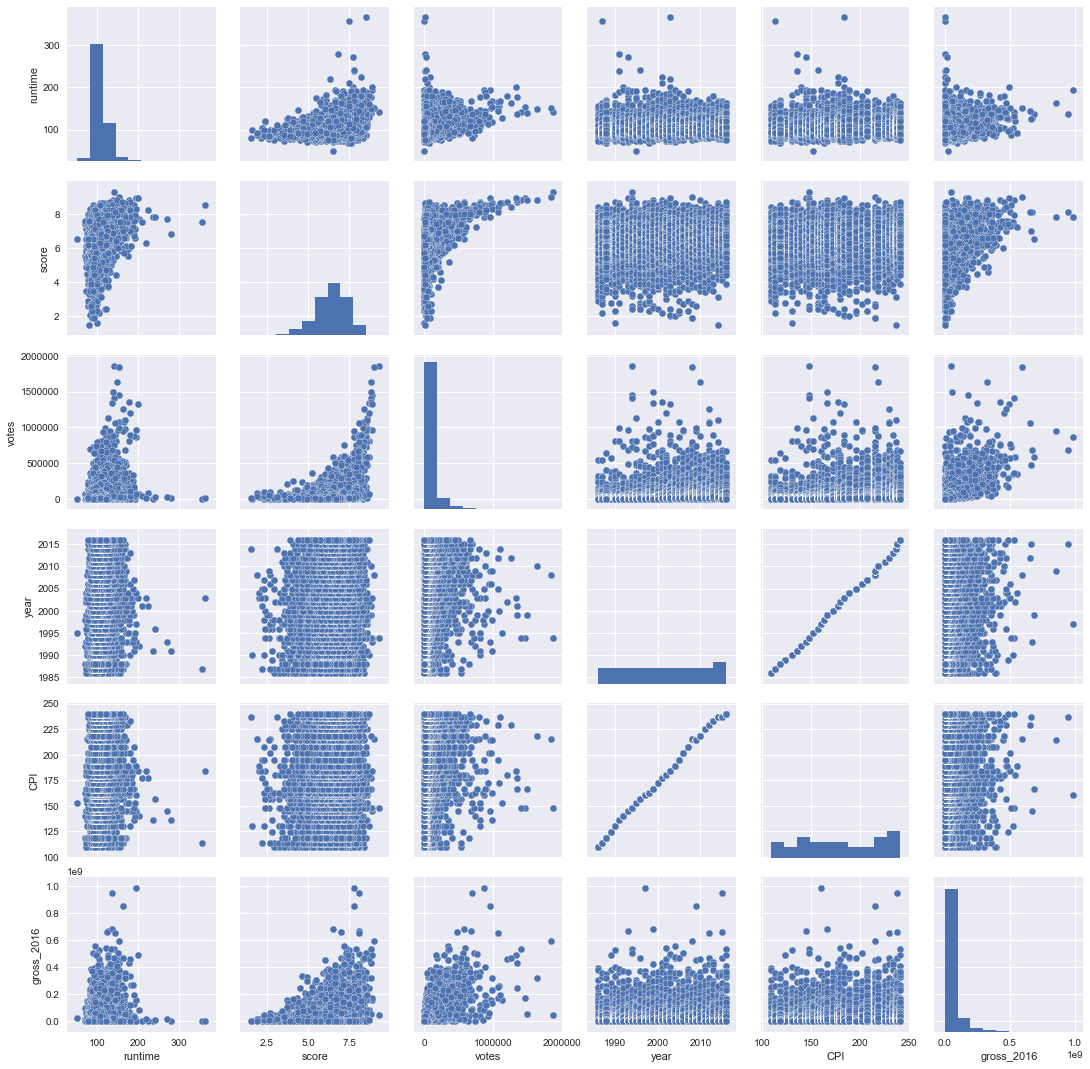

In [8]:
sns.pairplot(df)

# Transforming "gross"

In [11]:
df["gross_2016_transformed"], method_gross = stats.boxcox(df[['gross_2016']])
method_gross

array([ 0.17119825])

# gross transformation >>> log(gross)

In [10]:
df.head()

,country,genre,rating,released,runtime,score,star,votes,year,CPI,gross_2016,gross_2016_transformed
0,USA,Adventure,R,1986-08-22,89,8.1,Wil Wheaton,299174,1986,109.6,1.145028e+08,134.167797
1,USA,Comedy,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,1986,109.6,1.535897e+08,141.387207
2,USA,Action,PG,1986-05-16,110,6.9,Tom Cruise,236909,1986,109.6,3.937403e+08,167.134719
3,USA,Action,R,1986-07-18,137,8.4,Sigourney Weaver,540152,1986,109.6,1.864901e+08,146.361563
4,USA,Adventure,PG,1986-08-01,90,6.9,Joey Cramer,36636,1986,109.6,4.065413e+07,111.423197


# Nothing impressive so far

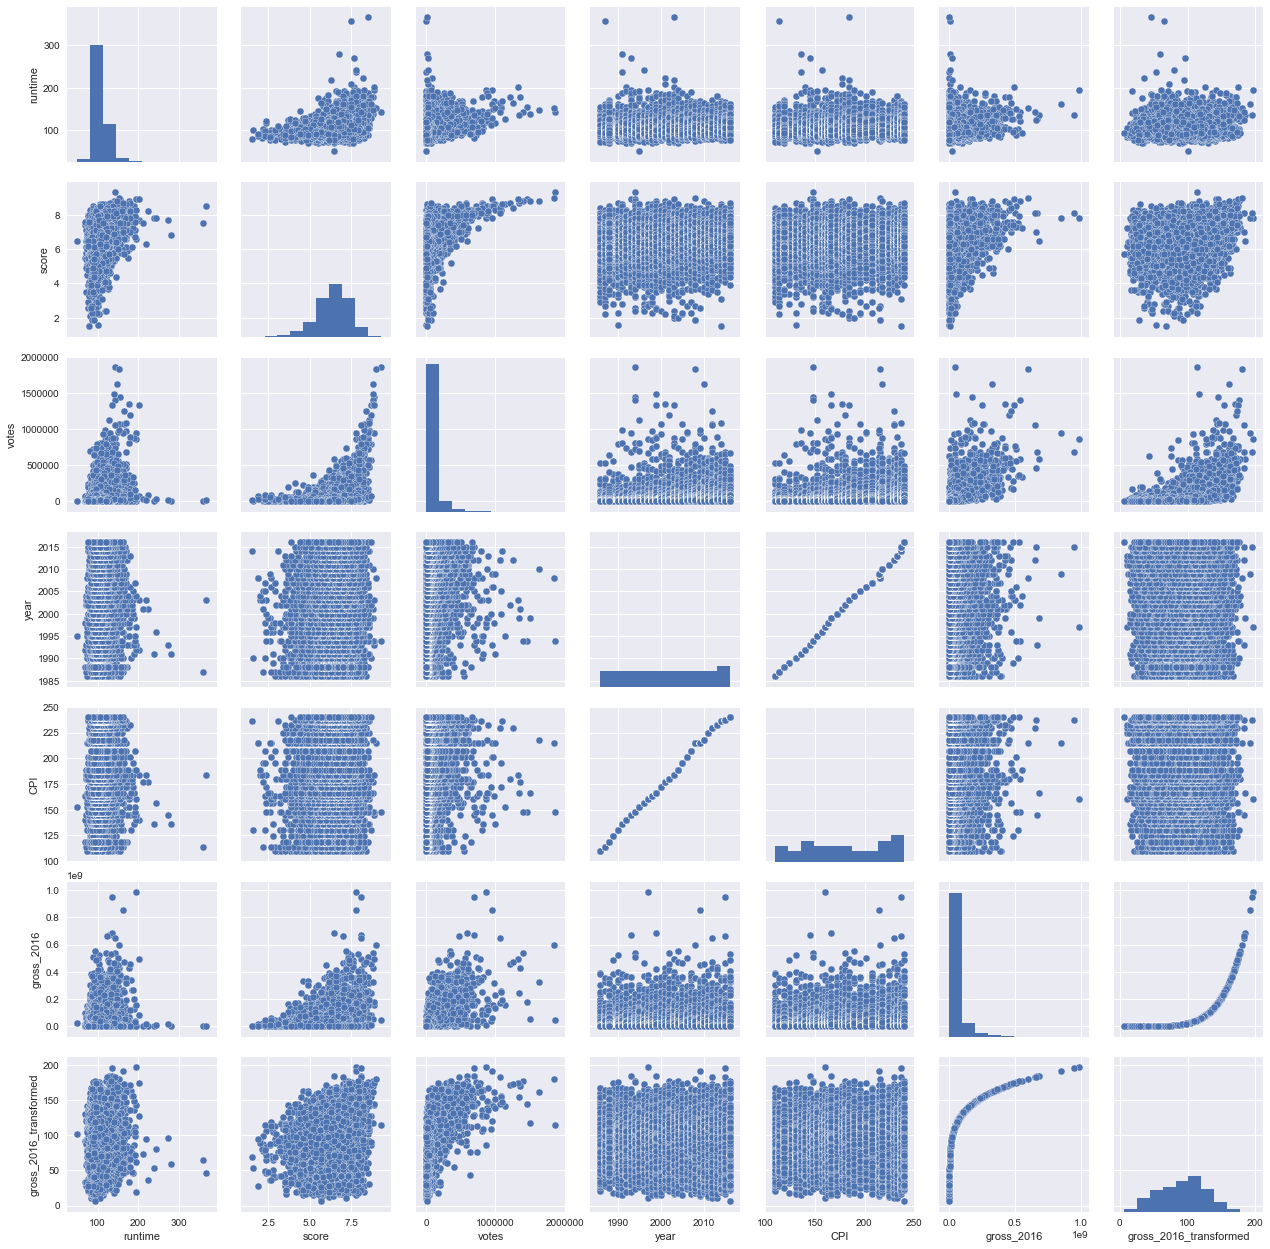

In [12]:
sns.pairplot(df)

# Transforming the rest of the columns

In [13]:
df["runtime_transformed"], method_runtime = stats.boxcox(df[['runtime']])
method_runtime

array([-1.51233554])

# runtime transformation >>> $runtime^{-1} = 1/runtime$

In [14]:
df["score_transformed"], method_score = stats.boxcox(df[['score']])
method_score

array([ 2.09836283])

#  score transformation >>> $score^2$

In [15]:
df["votes_transformed"], method_votes = stats.boxcox(df[['votes']])
method_votes

array([ 0.06392907])

# votes transformation >>> log(votes)

In [16]:
df["votes_transformed"], method_gross = stats.boxcox(df[['votes']])
method_gross

array([ 0.06392907])

# year transformation (added by hador)

In [17]:
df["year_transformed"], method_gross = stats.boxcox(df[['year']])
method_gross

array([ 0.73362205])

# gross transformation >>> log(gross)# 

# Scatter plots with all transformations

In [18]:
df.head()

,country,genre,rating,released,runtime,score,star,votes,year,CPI,gross_2016,gross_2016_transformed,runtime_transformed,score_transformed,votes_transformed,year_transformed
0,USA,Adventure,R,1986-08-22,89,8.1,Wil Wheaton,299174,1986,109.6,1.145028e+08,134.167797,0.660484,37.933996,19.382195,356.731615
1,USA,Comedy,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,1986,109.6,1.535897e+08,141.387207,0.660632,35.009481,19.109473,356.731615
2,USA,Action,PG,1986-05-16,110,6.9,Tom Cruise,236909,1986,109.6,3.937403e+08,167.134719,0.660688,26.959967,18.863584,356.731615
3,USA,Action,R,1986-07-18,137,8.4,Sigourney Weaver,540152,1986,109.6,1.864901e+08,146.361563,0.660841,40.979946,20.730404,356.731615
4,USA,Adventure,PG,1986-08-01,90,6.9,Joey Cramer,36636,1986,109.6,4.065413e+07,111.423197,0.660496,26.959967,14.982093,356.731615


In [19]:
df_numerical_transformed = df[['gross_2016_transformed', 'runtime_transformed', 'score_transformed',
                              'votes_transformed', 'year_transformed']].copy()

#pd.DataFrame([df['gross_2016_transformed'], df['runtime_transformed'], 
                                         #df['score_transformed'], df['votes_transformed'], df['year_transformed']])

In [20]:
df_numerical_transformed.head()

,gross_2016_transformed,runtime_transformed,score_transformed,votes_transformed,year_transformed
0,134.167797,0.660484,37.933996,19.382195,356.731615
1,141.387207,0.660632,35.009481,19.109473,356.731615
2,167.134719,0.660688,26.959967,18.863584,356.731615
3,146.361563,0.660841,40.979946,20.730404,356.731615
4,111.423197,0.660496,26.959967,14.982093,356.731615


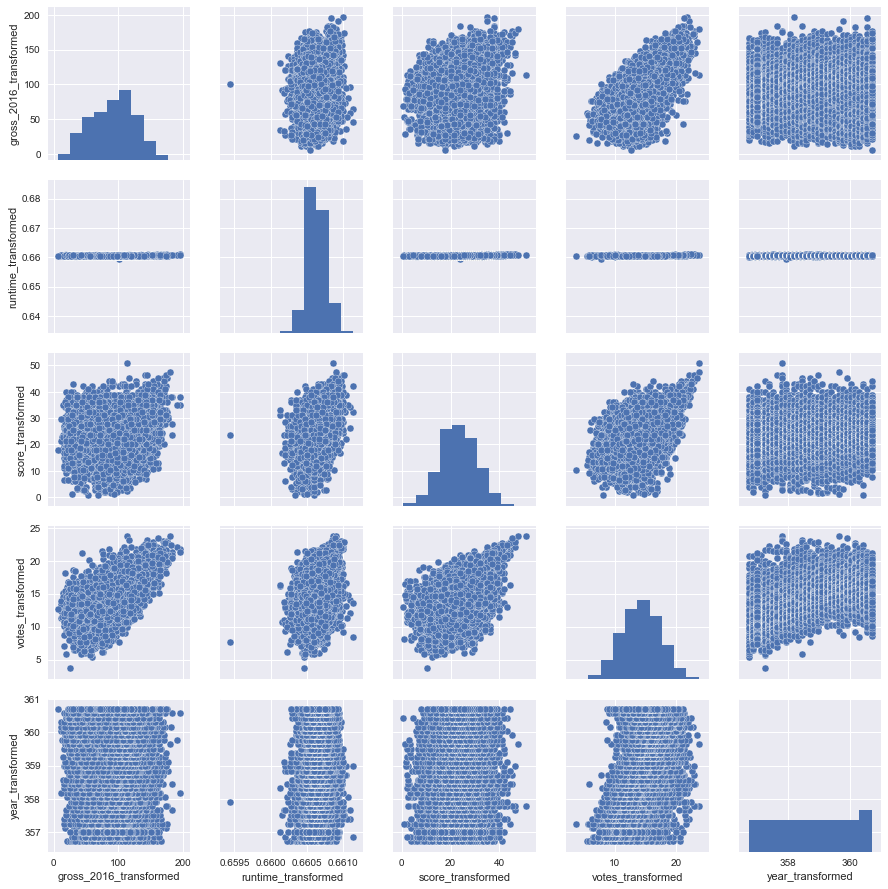

In [21]:
sns.pairplot(df_numerical_transformed)

In [22]:
report_with_gross = sm.OLS.from_formula(
    'gross_2016 ~ score_transformed + votes_transformed + year_transformed + C(genre) + C(rating)', df).fit()
report_with_gross.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gross_2016   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:07:04   Log-Likelihood:            -1.3099e+05
No. Observations:                6820   AIC:                         2.620e+05
Df Residuals:                    6788   BIC:                         2.623e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   5.543e+09    2.4e+08     23.121      0.000    5.07e+09    6.01e+09
C(genre)[T.Adventure]      -3.174e+06   3.18e+06     -0.998      0.318   -9.41e+06    3.06e+06
C(genre)[T.Animation]        2.62e+07   4.17e+06      6.277      0.000     1.8e+07    3.44e+07
C(genre)[T.Biography]      -1.614e+07   3.32e+06     -4.856      0.000   -2.27e+07   -9.62e+06
C(genre)[T.Comedy]         -1.215e+07   1.94e+06     -6.267      0.000   -1.59e+07   -8.35e+06
C(genre)[T.Crime]          -1.872e+07   2.86e+06     -6.546      0.000   -2.43e+07   -1.31e+07
C(genre)[T.Drama]          -1.333e+07   2.21e+06     -6.034      0.000   -1.77e+07      -9e+06
C(genre)[T.Family]         -2.091e+07   1.46e+07     -1.436      0.151   -4.95e+07    7.64e+06
C(genre)[T.Fantasy]        -1.959e+07   9.54e+06     -2.053      0.040   -3.83e+07   -8.84e+05
C(genre)[T.Horror]          -1.69e+07   3.56e+06     -4.750      0.000   -2.39e+07   -9.92e+06
C(genre)[T.Musical]         -2.36e+07   2.69e+07     -0.877      0.380   -7.63e+07    2.91e+07
C(genre)[T.Mystery]        -2.338e+07   8.76e+06     -2.668      0.008   -4.06e+07    -6.2e+06
C(genre)[T.Romance]         -5.95e+06   1.39e+07     -0.429      0.668   -3.32e+07    2.13e+07
C(genre)[T.Sci-Fi]         -3.415e+07   1.48e+07     -2.301      0.021   -6.32e+07   -5.06e+06
C(genre)[T.Thriller]        9.801e+05   1.27e+07      0.077      0.938   -2.39e+07    2.58e+07
C(genre)[T.War]            -5.728e+06   3.77e+07     -0.152      0.879   -7.96e+07    6.82e+07
C(genre)[T.Western]         4.715e+06   3.77e+07      0.125      0.900   -6.92e+07    7.86e+07
C(rating)[T.B15]            4.427e+07   7.53e+07      0.588      0.557   -1.03e+08    1.92e+08
C(rating)[T.G]               4.77e+07   5.35e+07      0.892      0.373   -5.72e+07    1.53e+08
C(rating)[T.NC-17]         -3.726e+06   5.45e+07     -0.068      0.945    -1.1e+08    1.03e+08
C(rating)[T.NOT RATED]      1.549e+07   5.34e+07      0.290      0.772   -8.92e+07     1.2e+08
C(rating)[T.Not specified]  3.118e+07   5.37e+07      0.581      0.561    -7.4e+07    1.36e+08
C(rating)[T.PG]             4.399e+07   5.33e+07      0.825      0.409   -6.05e+07    1.48e+08
C(rating)[T.PG-13]          3.869e+07   5.33e+07      0.726      0.468   -6.57e+07    1.43e+08
C(rating)[T.R]              1.467e+07   5.33e+07      0.276      0.783   -8.97e+07    1.19e+08
C(rating)[T.TV-14]          5.493e+07   7.53e+07      0.729      0.466   -9.27e+07    2.03e+08
C(rating)[T.TV-MA]          6.322e+07   7.53e+07      0.840      0.401   -8.44e+07    2.11e+08
C(rating)[T.TV-PG]          5.653e+07   7.53e+07      0.751      0.453   -9.11e+07    2.04e+08
C(rating)[T.UNRATED]        2.156e+07   5.36e+07      0.402      0.688   -8.36e+07    1.27e+08
score_transformed          -6.614e+05   1.1

In [23]:
report_with_gross_transformed = sm.OLS.from_formula(
    'gross_2016_transformed ~ score_transformed + votes_transformed + year_transformed + C(genre) + C(rating)', df).fit()
report_with_gross_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     gross_2016_transformed   R-squared:                       0.637
Model:                                OLS   Adj. R-squared:                  0.635
Method:                     Least Squares   F-statistic:                     384.1
Date:                    Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                            10:07:04   Log-Likelihood:                -30340.
No. Observations:                    6820   AIC:                         6.074e+04
Df Residuals:                        6788   BIC:                         6.096e+04
Df Model:                              31                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3809.9103     93.410     40.787      0.000    3626.798    3993.023
C(genre)[T.Adventure]         -0.5125      1.239     -0.414      0.679      -2.941       1.916
C(genre)[T.Animation]          6.9761      1.626      4.289      0.000       3.788      10.164
C(genre)[T.Biography]          2.2205      1.295      1.714      0.086      -0.318       4.759
C(genre)[T.Comedy]            -1.4657      0.755     -1.940      0.052      -2.946       0.015
C(genre)[T.Crime]             -3.9791      1.114     -3.571      0.000      -6.164      -1.795
C(genre)[T.Drama]             -2.8890      0.861     -3.356      0.001      -4.576      -1.202
C(genre)[T.Family]            -3.7198      5.674     -0.656      0.512     -14.844       7.404
C(genre)[T.Fantasy]           -6.6578      3.718     -1.791      0.073     -13.946       0.631
C(genre)[T.Horror]            -4.5704      1.386     -3.297      0.001      -7.288      -1.853
C(genre)[T.Musical]           -7.8273     10.481     -0.747      0.455     -28.372      12.718
C(genre)[T.Mystery]           -5.2155      3.414     -1.528      0.127     -11.909       1.478
C(genre)[T.Romance]           -0.3143      5.409     -0.058      0.954     -10.917      10.289
C(genre)[T.Sci-Fi]           -12.5931      5.782     -2.178      0.029     -23.928      -1.258
C(genre)[T.Thriller]          -6.3194      4.940     -1.279      0.201     -16.003       3.364
C(genre)[T.War]              -12.9158     14.688     -0.879      0.379     -41.709      15.877
C(genre)[T.Western]            4.4095     14.682      0.300      0.764     -24.373      33.192
C(rating)[T.B15]              -2.9088     29.344     -0.099      0.921     -60.432      54.614
C(rating)[T.G]                41.9212     20.848      2.011      0.044       1.053      82.789
C(rating)[T.NC-17]             5.8759     21.223      0.277      0.782     -35.727      47.479
C(rating)[T.NOT RATED]        -0.4188     20.809     -0.020      0.984     -41.212      40.374
C(rating)[T.Not specified]    14.8220     20.916      0.709      0.479     -26.179      55.823
C(rating)[T.PG]               38.8574     20.767      1.871      0.061      -1.852      79.567
C(rating)[T.PG-13]            34.9199     20.758      1.682      0.093      -5.771      75.611
C(rating)[T.R]                20.5481     20.754      0.990      0.322     -20.135      61.232
C(rating)[T.TV-14]            24.0783     29.344      0.821      0.412     -33.446      81.603
C(rating)[T.TV-MA]            25.3702     29.342      0.865      0.387     -32.149      82.889
C(rating)[T.TV-PG]            42.2821     29.344      1.441      0.150     -15.240      99.805
C(rating)[T.UNRATED]           5.5296     20.896      0.265      0.791     -35.433      46.493

# "report_with_gross_transformed" looks better and I am not sure? :)   
NEED TO DISCUSS

## Comparing results from Original and Transformed data using regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [25]:
#List of original numerical columns
df_numerical = df[['gross_2016', 'runtime', 'score', 'votes', 'year']].copy()
df_numerical.head()

,gross_2016,runtime,score,votes,year
0,1.145028e+08,89,8.1,299174,1986
1,1.535897e+08,103,7.8,264740,1986
2,3.937403e+08,110,6.9,236909,1986
3,1.864901e+08,137,8.4,540152,1986
4,4.065413e+07,90,6.9,36636,1986


In [26]:
df_numerical_transformed.head()

,gross_2016_transformed,runtime_transformed,score_transformed,votes_transformed,year_transformed
0,134.167797,0.660484,37.933996,19.382195,356.731615
1,141.387207,0.660632,35.009481,19.109473,356.731615
2,167.134719,0.660688,26.959967,18.863584,356.731615
3,146.361563,0.660841,40.979946,20.730404,356.731615
4,111.423197,0.660496,26.959967,14.982093,356.731615


In [27]:
# Creating a list of training and target variables using original data
training_list_orig = ['gross_2016', 'runtime', 'votes', 'year']
training_original = df_numerical[training_list_orig]
target_original = df_numerical['score']

X_original = training_original.values
y_original = target_original.values

In [28]:
#splitting between Training and Test
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.33, random_state=42)

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_orig, y_train_orig)

# Make predictions using the testing set
y_orig_pred_lr = regr.predict(X_test_orig)

Doing the same as above but for transformed data

In [30]:
# Creating a list of training and target variables using transformed data
training_transformed = ['gross_2016_transformed', 'runtime_transformed', 'votes_transformed', 'year_transformed']
training_transformed = df_numerical_transformed[training_transformed]
target_transformed = df_numerical['score']

X_transformed = training_transformed.values
y_transformed = target_transformed.values

#splitting between Training and Test
X_train_transf, X_test_transf, y_train_transf, y_test_transf = train_test_split(
    X_transformed, y_transformed, test_size=0.33, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_transf, y_train_transf)

# Make predictions using the testing set
y_transf_pred_lr = regr.predict(X_test_transf)

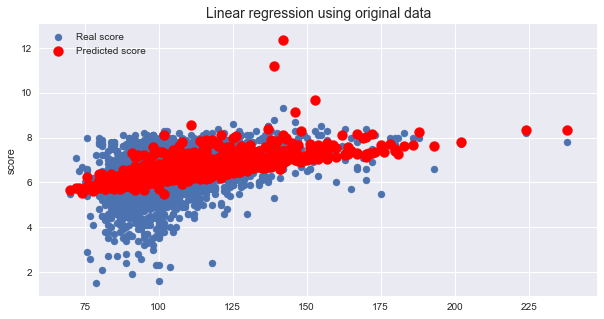

In [31]:
# Results of linear regression using original data
f = plt.figure(figsize=(10,5))
plt.scatter(X_test_orig[:,1], y_test_orig, s=50,label="Real score");
plt.scatter(X_test_orig[:,1], y_orig_pred_lr,s=100, c='r',label="Predicted score");
plt.title('Linear regression using original data', fontsize=14)
plt.ylabel("score");
plt.legend(loc=2);

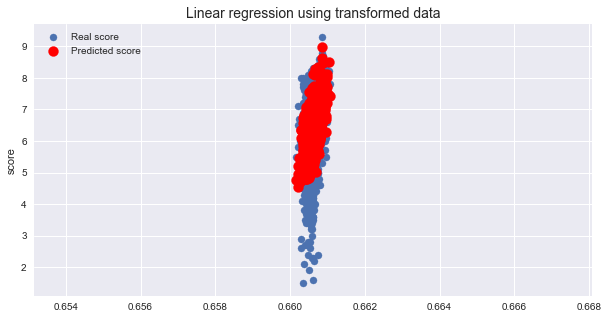

In [32]:
# Results of linear regression using transformed data
f = plt.figure(figsize=(10,5))
plt.scatter(X_test_transf[:,1], y_test_transf, s=50,label="Real score");
plt.scatter(X_test_transf[:,1], y_transf_pred_lr,s=100, c='r',label="Predicted score");
plt.title('Linear regression using transformed data', fontsize=14)
plt.ylabel("score");
plt.legend(loc=2);

### I'm not sure how to interpret this difference